## This is a small project in whick I will build a CNN

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import random

# Tensorflow and keras for the NN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, ZeroPadding2D, Input, BatchNormalization
from tensorflow.keras import optimizers

print(tf.__version__)

In [111]:
def create_img():
    """
    desciption: This creates a white greyscale image (128x128) and places a black rectangle somewhere randomly.
    returns:    Tupel of 1.: the image and 2.: the position and dimensions of the rectangle.
    """
    #create a image (128x128)in grayscale with a white background (255)
    img = [[255 for i in range(128)]for j in range(128)]

    #create a rectangle with random height, width and position
    rect_height = random.randint(2,50)
    rect_width = random.randint(2,50)
    rect =  {
        'height': rect_height,
        'width': rect_width,
        'x':random.randint(rect_width, 128-rect_width),
        'y': random.randint(rect_height, 128-rect_height)
        }

    #draw rectangle in image
    for i,x in enumerate(img):
        for j,y in enumerate(x):
            if i > rect['x'] - rect['width']//2 and i < rect['x'] + rect['width']//2 and j > rect['y'] - rect['height']//2 and j < rect['y'] + rect['height']//2:
                img[i][j] = 0
    img = np.asarray(img).transpose()

    return (img, rect)

def print_img(images, img):
    plt.imshow(images[img][0], cmap='gray')
    print(images[img][1])

### Create 10,000 images

In [116]:
images = []
for i in range (10000):
    images.append(create_img())

{'height': 35, 'width': 38, 'x': 89, 'y': 88}


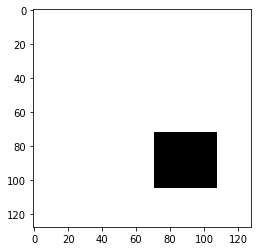

In [121]:
print_img(images, 9999)

### Train the CNN

In [172]:
#split the data into training and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split([i[0] for i in images], [list((i[1].values())) for i in images], test_size=0.25)

In [181]:
x_train = np.asarray(x_train).reshape(len(x_train),x_train[0].shape[0],x_train[0].shape[0],1)
x_test = np.asarray(x_test).reshape(len(x_test),x_test[0].shape[0],x_test[0].shape[0],1)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [183]:
model = Sequential()

model.add(Conv2D(64, (3,3), input_shape=(x_train[0].shape[0], x_train[0].shape[1], 1)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(ZeroPadding2D(padding=(1,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(y_train[0].shape[0]))
model.add(Activation("relu"))

optimizer = optimizers.Adam()
model.compile(loss='mean_squared_error',
             optimizer=optimizer,
             metrics=['mse'])

model.summary()
history = model.fit(x_train, y_train, batch_size=128, epochs=2, validation_data=(x_test, y_test))

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 126, 126, 64)      640       
_________________________________________________________________
activation_22 (Activation)   (None, 126, 126, 64)      0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 61, 61, 64)        36928     
_________________________________________________________________
activation_23 (Activation)   (None, 61, 61, 64)        0         
_________________________________________________________________
zero_padding2d_7 (ZeroPaddin (None, 63, 63, 64)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 31, 31, 64)      

In [184]:
predictions = model.predict(x_test)
print("Predicted values of some random datapoints:")
print(predictions[0])
print(predictions[1])
print(predictions[50])
print(predictions[51])
print(predictions[199])
print(predictions[200])

print("And the true Values at those points:")
print(y_test[0])
print(y_test[1])
print(y_test[50])
print(y_test[51])
print(y_test[199])
print(y_test[200])

Predicted values of some random datapoints:
[11.29169  0.       0.       0.     ]
[12.216062  0.        0.        0.      ]
[0.3982693  0.07860021 0.         0.        ]
[11.49628  0.       0.       0.     ]
[11.7548065  0.         0.         0.       ]
[ 1.9108583 31.990421   0.         0.       ]
And the true Values at those points:
[29 25 77 46]
[36 15 32 56]
[15  6 26 91]
[23 18 45 78]
[36 28 59 62]
[  9  50  68 115]
